In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
energy = pd.read_csv("pjm_hourly_est.csv")
energy.index = energy.Datetime
energy = energy['PJM_Load']
energy.head()

Datetime
1998-12-31 01:00:00    29309.0
1998-12-31 02:00:00    28236.0
1998-12-31 03:00:00    27692.0
1998-12-31 04:00:00    27596.0
1998-12-31 05:00:00    27888.0
Name: PJM_Load, dtype: float64

In [26]:
energy.describe()

count    32896.000000
mean     29766.427408
std       5849.769954
min      17461.000000
25%      25473.000000
50%      29655.000000
75%      33073.250000
max      54030.000000
Name: PJM_Load, dtype: float64

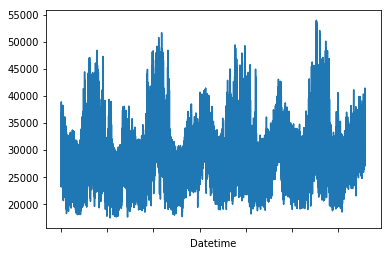

In [27]:
energy.plot()

In [29]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(energy, model='multiplicative')
fig = result.plot()
plot_mpl(fig)

AttributeError: 'Index' object has no attribute 'inferred_freq'

In [30]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

ModuleNotFoundError: No module named 'pyramid'